In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Men_Perfumes.csv')
print(df.head())

             brand                                              title  \
0             Dior  christian dior sauvage mens edp 3.4 oz fragran...   
1          AS SHOW  aventus eau de parfum 3.3 oz 100ml millesime e...   
2        Unbranded                   hogo boss cologne for men 3.4 oz   
3   Giorgio Armani  acqua di gio by giorgio armani 6.7 fl oz eau d...   
4  Multiple Brands  mens perfume sampler 10pcs sample vials design...   

              type   price         pricewithcurrency  available  \
0    Eau de Parfum   84.99  US $84.99Eau de Parfumea         10   
1    Eau de Parfum  109.99                US $109.99          8   
2  Eau de Toilette  100.00                US $100.00         10   
3  Eau de Toilette   44.99  US $44.99Eau de Parfumea          2   
4          Perfume   14.99                 US $14.99         10   

                                   availabletext  sold  \
0  More than 10 available Eau de Parfum 116 sold   116   
1              8 available Eau de Parfum 4

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              847 non-null    object 
 1   title              847 non-null    object 
 2   type               847 non-null    object 
 3   price              847 non-null    float64
 4   pricewithcurrency  847 non-null    object 
 5   available          847 non-null    int64  
 6   availabletext      847 non-null    object 
 7   sold               847 non-null    int64  
 8   lastupdated        847 non-null    object 
 9   itemlocation       847 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 66.3+ KB
None
            price   available          sold
count  847.000000  847.000000    847.000000
mean    45.161393   20.615112    479.042503
std     33.973188   62.984355   1563.775730
min      3.000000    2.000000      1.000000
25%     21.995000    5.000000  

# Counting the null Values

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)



brand                0
title                0
type                 0
price                0
pricewithcurrency    0
available            0
availabletext        0
sold                 0
lastupdated          0
itemlocation         0
dtype: int64


# Highest Sale

In [ ]:
highest_sale = df['sold'].max()
print(f"The highest sale is: {highest_sale}")


The highest sale is: 21310


# Brand with highest number of Sales and Availability

In [ ]:
grouped_df = df.groupby('brand').agg({'sold': 'sum', 'available': 'sum'}).reset_index()
highest_sales_brand = grouped_df.loc[grouped_df['sold'].idxmax()]
print(f"Brand with the highest number of sales:\n{highest_sales_brand}")



Brand with the highest number of sales:
brand        Versace
sold           44352
available        537
Name: 209, dtype: object


# TOP 5 BRANDS SOLD

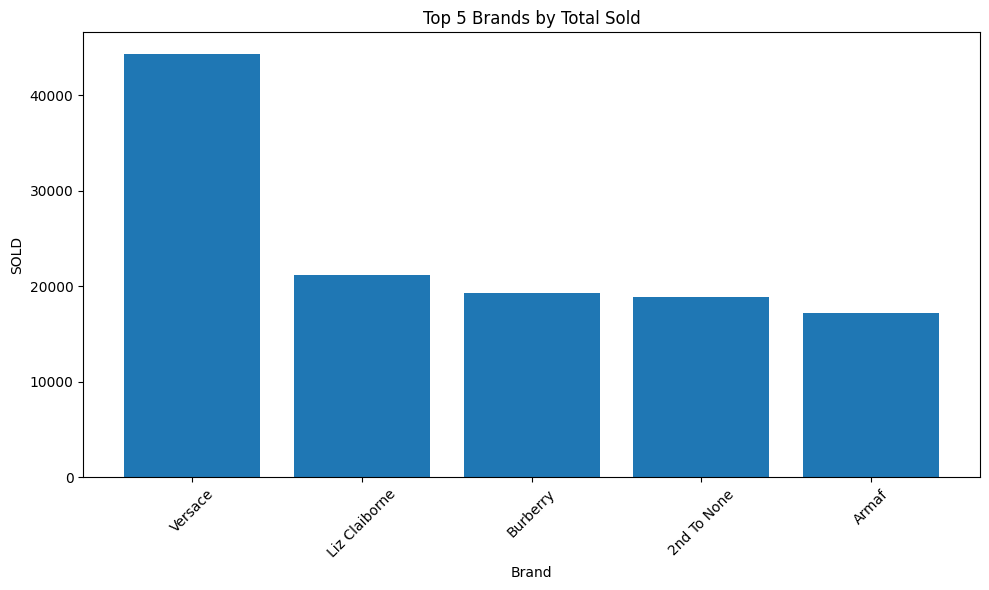

In [ ]:
import matplotlib.pyplot as plt

# Top 5 brands by sales
top_brands = df.groupby('brand')['sold'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values)
plt.title('Top 5 Brands by Total Sold')
plt.xlabel('Brand')
plt.ylabel('SOLD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Brands by No of Perfumes

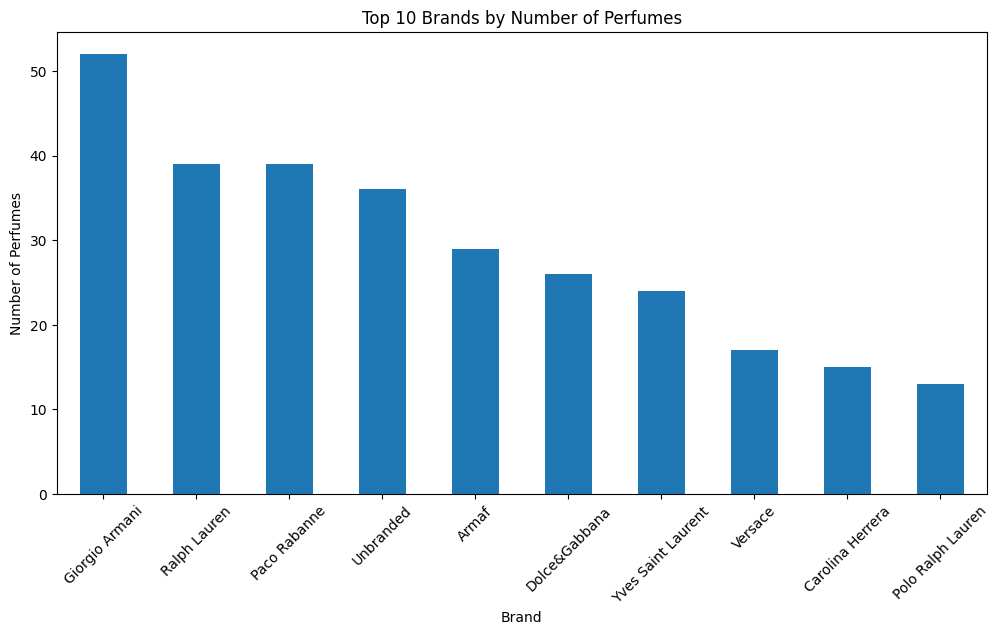

In [ ]:
plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands by Number of Perfumes')
plt.xlabel('Brand')
plt.ylabel('Number of Perfumes')
plt.xticks(rotation=45)
plt.show()

# Distribution Of Perfumes by Prices

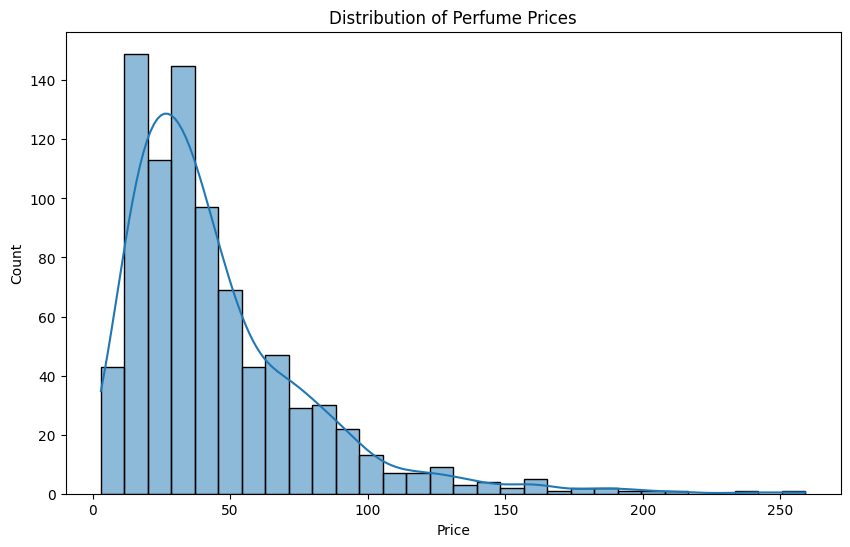

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Perfume Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Men's Perfume Sales Dashboard

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, subplot_titles=("Top Brands", "Price Distribution", "Price vs. Sold", "Sales Over Time"))

# Top Brands
top_brands = df['brand'].value_counts().head(10)
fig.add_trace(go.Bar(x=top_brands.index, y=top_brands.values), row=1, col=1)

# Price Distribution
fig.add_trace(go.Histogram(x=df['price']), row=1, col=2)

# Price vs. Sold
fig.add_trace(go.Scatter(x=df['price'], y=df['sold'], mode='markers'), row=2, col=1)

# Sales Over Time
daily_sales = df.groupby('lastupdated')['sold'].sum().reset_index()
fig.add_trace(go.Scatter(x=daily_sales['lastupdated'], y=daily_sales['sold']), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Men's Perfume Sales Dashboard")
fig.show()

In [ ]:
import plotly.express as px

# Assuming df has 'date', 'brand', 'sales', 'price', 'sold' columns
fig = px.scatter(df, x="price", y="sold", animation_frame="lastupdated",
                 animation_group="brand", size="sold", color="brand",
                 hover_name="brand", log_x=True, size_max=55,
                 range_x=[10,1000], range_y=[0,1000])

fig.update_layout(title='Brand Performance Over Time')
fig.show()

             brand                                              title  \
0             Dior  christian dior sauvage mens edp 3.4 oz fragran...   
1          AS SHOW  aventus eau de parfum 3.3 oz 100ml millesime e...   
2        Unbranded                   hogo boss cologne for men 3.4 oz   
3   Giorgio Armani  acqua di gio by giorgio armani 6.7 fl oz eau d...   
4  Multiple Brands  mens perfume sampler 10pcs sample vials design...   

              type   price         pricewithcurrency  available  \
0    Eau de Parfum   84.99  US $84.99Eau de Parfumea         10   
1    Eau de Parfum  109.99                US $109.99          8   
2  Eau de Toilette  100.00                US $100.00         10   
3  Eau de Toilette   44.99  US $44.99Eau de Parfumea          2   
4          Perfume   14.99                 US $14.99         10   

                                   availabletext  sold  \
0  More than 10 available Eau de Parfum 116 sold   116   
1              8 available Eau de Parfum 4

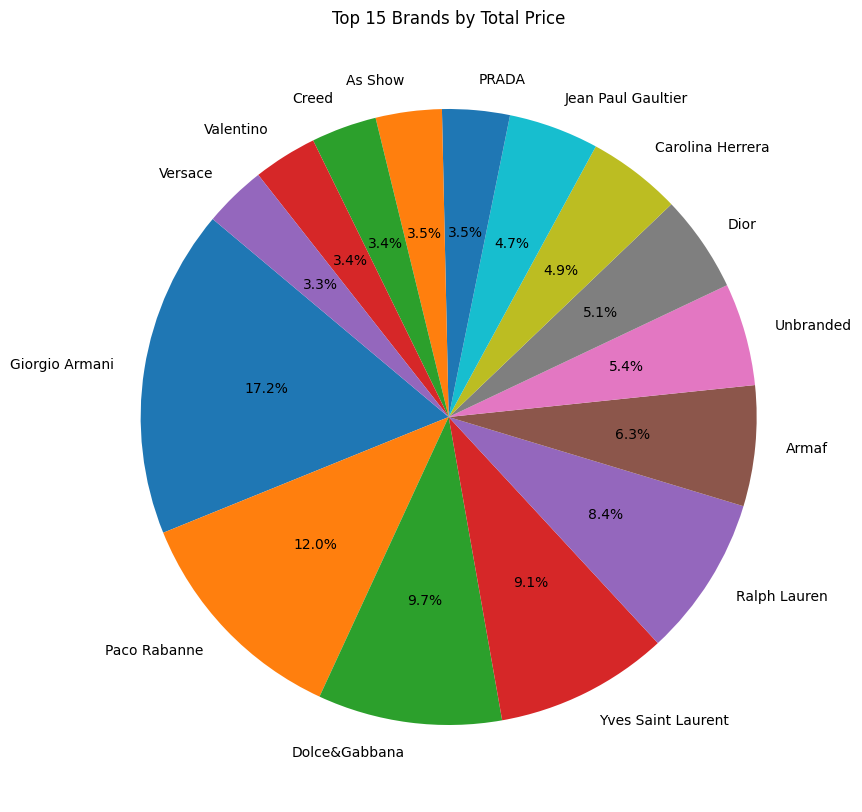

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = '/content/Men_Perfumes.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure the DataFrame contains the expected columns
print(df.head())

# Group by brand and aggregate total price
grouped_df = df.groupby('brand').agg({'price': 'sum'}).reset_index()

# Sort by total price and select the top 15 brands
top_brands = grouped_df.sort_values(by='price', ascending=False).head(15)

# Plot Pie Chart for Top 15 Brands Based on Price
plt.figure(figsize=(10, 10))
plt.pie(top_brands['price'], labels=top_brands['brand'], autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Brands by Total Price')
plt.show()





# FEMALE PERFUME DATA ANALYSIS

In [ ]:
df = pd.read_csv('/content/female perfume.csv')
print(df.head())

             fbrand                                             ftitle  \
0  Carolina Herrera  Good Girl by Carolina Herrera 2.7 oz Eau De Pa...   
1          As Shown  Parfums de Marly Delina La Rosee Eau de Parfum...   
2             PRADA  PRADA Paradoxe by Prada EDP 3.0oz90ml Spray Pe...   
3           As Show  Jadore Parfum Deau by Christian 3.4 oz EDP Fra...   
4     Viktor & Rolf  Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...   

           ftype  fprice fpricewithtext  favailable  \
0  Eau de Parfum   43.99    US $43.99ea           2   
1  Eau de Parfum   79.99      US $79.99           5   
2  Eau de Parfum   59.99      US $59.99          10   
3  Eau de Parfum   59.99    US $59.99ea          10   
4  Eau de Parfum   51.99    US $51.99ea           8   

             favailabilitywithtext  fsold            fitemupdated  \
0            2 available  393 sold    393  May 23, 2024 10:43:50    
1             5 available  40 sold     40  May 24, 2024 00:15:48    
2  More than 10 a

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fbrand                 807 non-null    object 
 1   ftitle                 807 non-null    object 
 2   ftype                  806 non-null    object 
 3   fprice                 807 non-null    float64
 4   fpricewithtext         807 non-null    object 
 5   favailable             807 non-null    int64  
 6   favailabilitywithtext  807 non-null    object 
 7   fsold                  807 non-null    int64  
 8   fitemupdated           807 non-null    object 
 9   perfumelocation        807 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 63.2+ KB
None
           fprice  favailable         fsold
count  807.000000  807.000000    807.000000
mean    38.293817   22.374226    446.328377
std     26.300032   53.212633   1195.070129
min      1.990000    2.0000

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


fbrand                   0
ftitle                   0
ftype                    1
fprice                   0
fpricewithtext           0
favailable               0
favailabilitywithtext    0
fsold                    0
fitemupdated             0
perfumelocation          0
dtype: int64


In [ ]:
highest_sale = df['fsold'].max()
print(f"The highest sale is: {highest_sale}")

The highest sale is: 15897


In [ ]:
grouped_df = df.groupby('fbrand').agg({'fsold': 'sum', 'favailable': 'sum'}).reset_index()
highest_sales_brand = grouped_df.loc[grouped_df['fsold'].idxmax()]
print(f"Brand with the highest number of sales:\n{highest_sales_brand}")

Brand with the highest number of sales:
fbrand        Versace
fsold           22092
favailable        504
Name: 198, dtype: object


# Top 5 Brand Sold

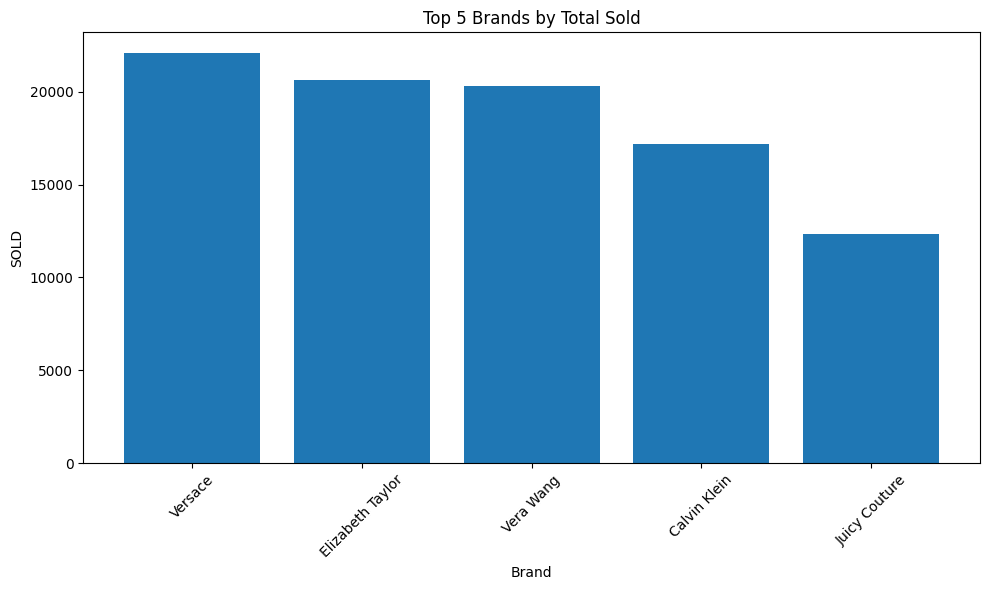

In [ ]:
import matplotlib.pyplot as plt

# Top 5 brands by sales
top_brands = df.groupby('fbrand')['fsold'].sum().nlargest(5)

plt.figure(figsize=(10, 6))
plt.bar(top_brands.index, top_brands.values)
plt.title('Top 5 Brands by Total Sold')
plt.xlabel('Brand')
plt.ylabel('SOLD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Brans by No of Perfumes in List

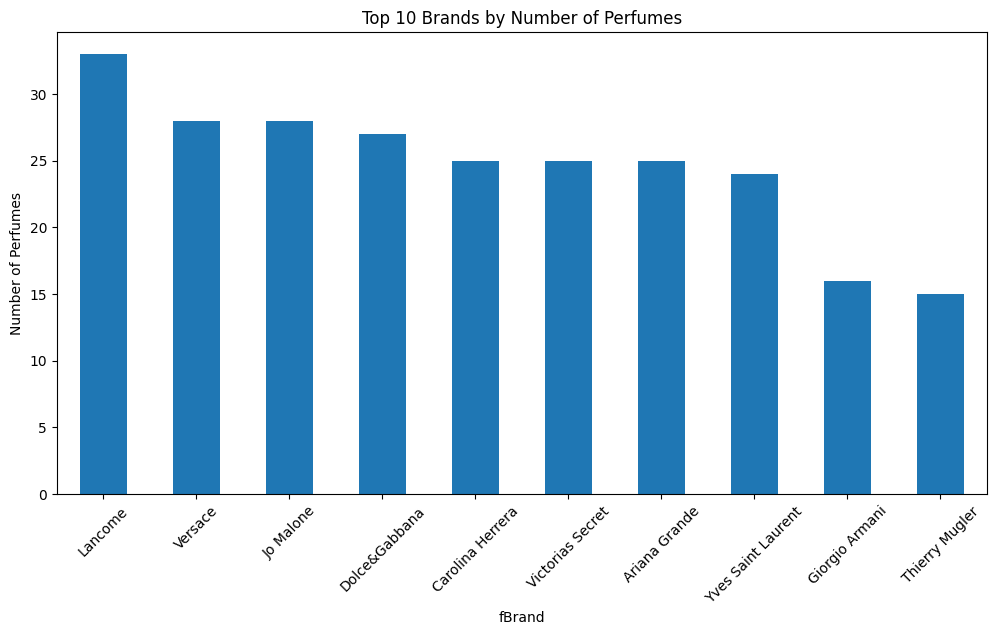

In [ ]:
plt.figure(figsize=(12, 6))
df['fbrand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands by Number of Perfumes')
plt.xlabel('fBrand')
plt.ylabel('Number of Perfumes')
plt.xticks(rotation=45)
plt.show()

# Distribution Of Perfumes by Prices

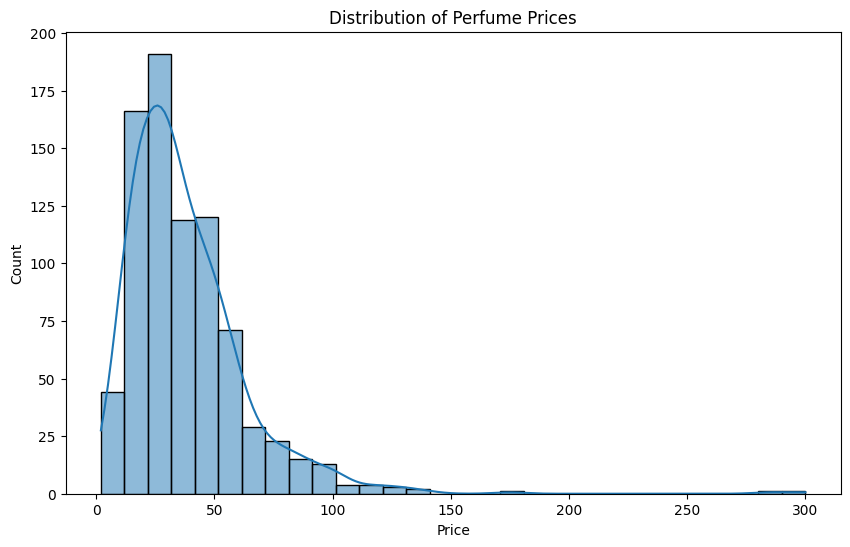

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['fprice'], bins=30, kde=True)
plt.title('Distribution of Perfume Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Female Perfume Sales Dashboard

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, subplot_titles=("Top Brands", "Price Distribution", "Price vs. Sold", "Sales Over Time"))

# Top Brands
top_brands = df['fbrand'].value_counts().head(10)
fig.add_trace(go.Bar(x=top_brands.index, y=top_brands.values), row=1, col=1)

# Price Distribution
fig.add_trace(go.Histogram(x=df['fprice']), row=1, col=2)

# Price vs. Sold
fig.add_trace(go.Scatter(x=df['fprice'], y=df['fsold'], mode='markers'), row=2, col=1)

# Sales Over Time
daily_sales = df.groupby('fitemupdated')['fsold'].sum().reset_index()
fig.add_trace(go.Scatter(x=daily_sales['fitemupdated'], y=daily_sales['fsold']), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Female Perfume Sales Dashboard")
fig.show()

             fbrand                                             ftitle  \
0  Carolina Herrera  Good Girl by Carolina Herrera 2.7 oz Eau De Pa...   
1          As Shown  Parfums de Marly Delina La Rosee Eau de Parfum...   
2             PRADA  PRADA Paradoxe by Prada EDP 3.0oz90ml Spray Pe...   
3           As Show  Jadore Parfum Deau by Christian 3.4 oz EDP Fra...   
4     Viktor & Rolf  Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...   

           ftype  fprice fpricewithtext  favailable  \
0  Eau de Parfum   43.99    US $43.99ea           2   
1  Eau de Parfum   79.99      US $79.99           5   
2  Eau de Parfum   59.99      US $59.99          10   
3  Eau de Parfum   59.99    US $59.99ea          10   
4  Eau de Parfum   51.99    US $51.99ea           8   

             favailabilitywithtext  fsold            fitemupdated  \
0            2 available  393 sold    393  May 23, 2024 10:43:50    
1             5 available  40 sold     40  May 24, 2024 00:15:48    
2  More than 10 a

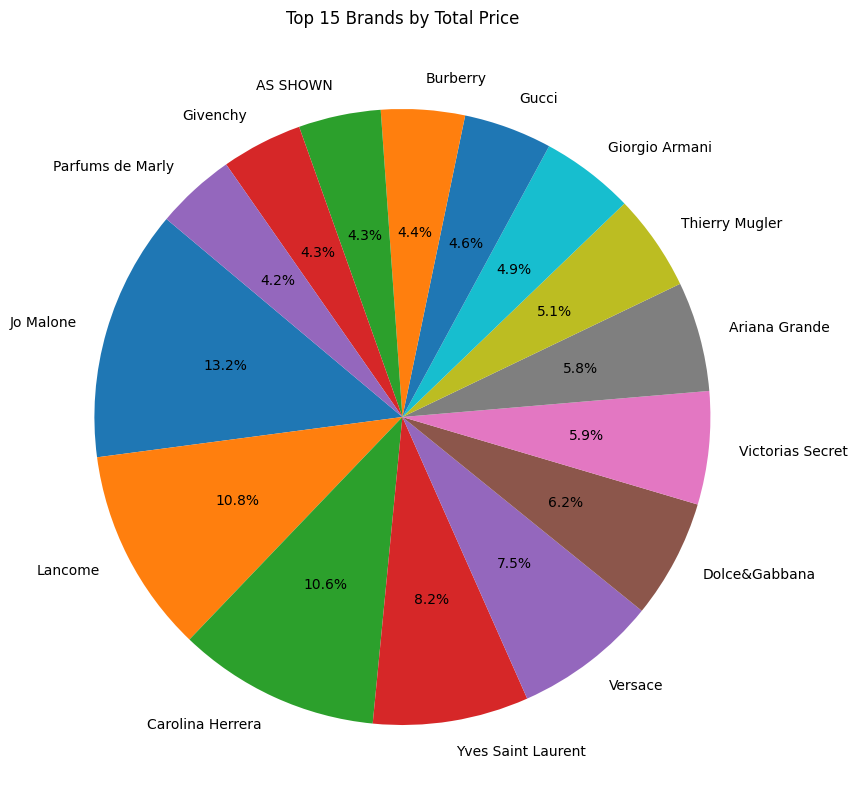

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = '/content/female perfume.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure the DataFrame contains the expected columns
print(df.head())

# Group by brand and aggregate total price
grouped_df = df.groupby('fbrand').agg({'fprice': 'sum'}).reset_index()

# Sort by total price and select the top 15 brands
top_brands = grouped_df.sort_values(by='fprice', ascending=False).head(15)

# Plot Pie Chart for Top 15 Brands Based on Price
plt.figure(figsize=(10, 10))
plt.pie(top_brands['fprice'], labels=top_brands['fbrand'], autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Brands by Total Price')
plt.show()
